# Question 3

*Do Casting Patterns Exhibit Biases Based on Actor Traits?\
Do casting patterns exhibit biases based on actor traits like age, gender, or ethnicity? Are there noticeable trends in how certain demographics are cast in specific roles? Examining these patterns can shed light on potential biases within the casting industry.*

In [1]:
# ignore
%load_ext autoreload
%autoreload 2

In [2]:
# ignore
%config InlineBackend.figure_formats = ['svg']
%matplotlib inline

In [3]:
# ignore
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import os
import sys
sys.path.append(os.path.join(os.getcwd(), "../visualization"))
from plot_3d_like import plot_2d_heatmap

In [4]:
# ignore
sys.path.insert(0, '../..')
from src.scripts.load_data import data

data.shape

(87210, 21)

The specific feature value affects archetype, if the probability to play a character with this archetype differs significantly between an actor with fixed feature value and an actor with no fixed value. It means that if \\(P(Archetype)\\) differs significantly from \\(P(Archetype|Feature)\\).\
The heatmap below represents \\(P(Archetype|Feature) - P(Archetype)\\). The blue color is for the negative values, the orange color is for the positive ones, and `NSS` (Not Statistically Significant).

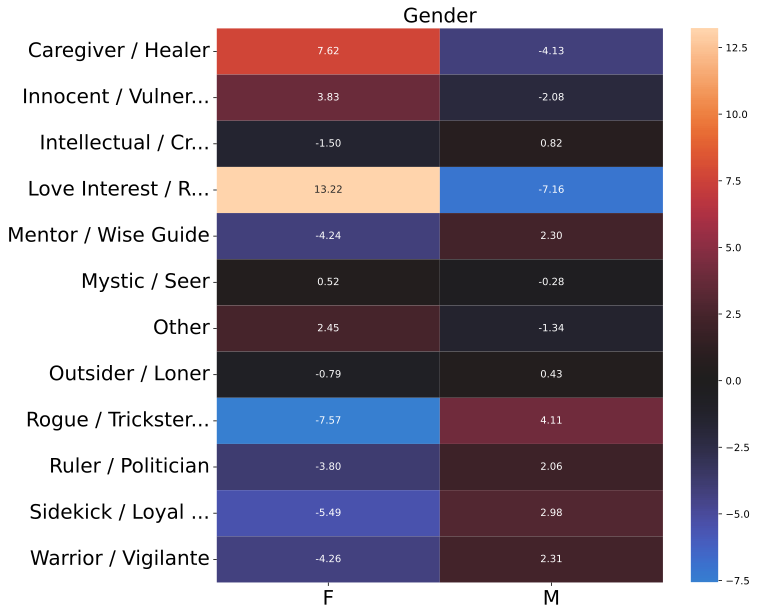

In [5]:
# hidecode

# We wrote a function to plot the 2D heatmap, which is a wrapper around 
# the seaborn heatmap function.
# please take a look at the function in the `plot_3d_like.py` file
plt.figure(figsize=(1 * 10, 1 * 10))
for i, (s, title) in enumerate(zip(
    ["actor_gender"],
    ["Gender"],
)):
    plt.title(title, fontsize=20)
    grid = plot_2d_heatmap(
        data, s, "archetype", 
        normalize="first", 
        compare_default_value="subtract",
        percentage=True,
        num_ybins=13,
        mht=True,
        do_not_show_x=["Other"] if title in ["Education", "Gender"] else None,
    )
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)

Conditioning on `Gender` reveals a striking pattern: when the probability of playing a specific archetype increases for `Female` actors, it correspondingly decreases for `Male` actors, and vice versa. This asymmetry underscores how men and women are differently positioned within cinematic narratives, highlighting potential biases in how directors and screenwriters envision characters based on gender. The implications are profound, as the film industry not only reflects societal norms but actively shapes them. The figure illustrates this bias vividly, with the most significant differences observed in archetypes such as `Love Interest/Romantic Partner` (Female +13%, Male -7%), `Caregiver / Healer` (Female +7%, Male -4%), `Rogue / Trickster / Con Artist` (Female -7%, Male +4%), and `Sidekick / Local Companion` (Female -5%, Male +3%). Our dataset has films only until 2017, so there is a hope that this situation is different now.

The heatmaps below represent the difference in distributions when conditioning on features closely related to Race: `Race`, `Religion`, `Nationality`, and `Place of Birth`.

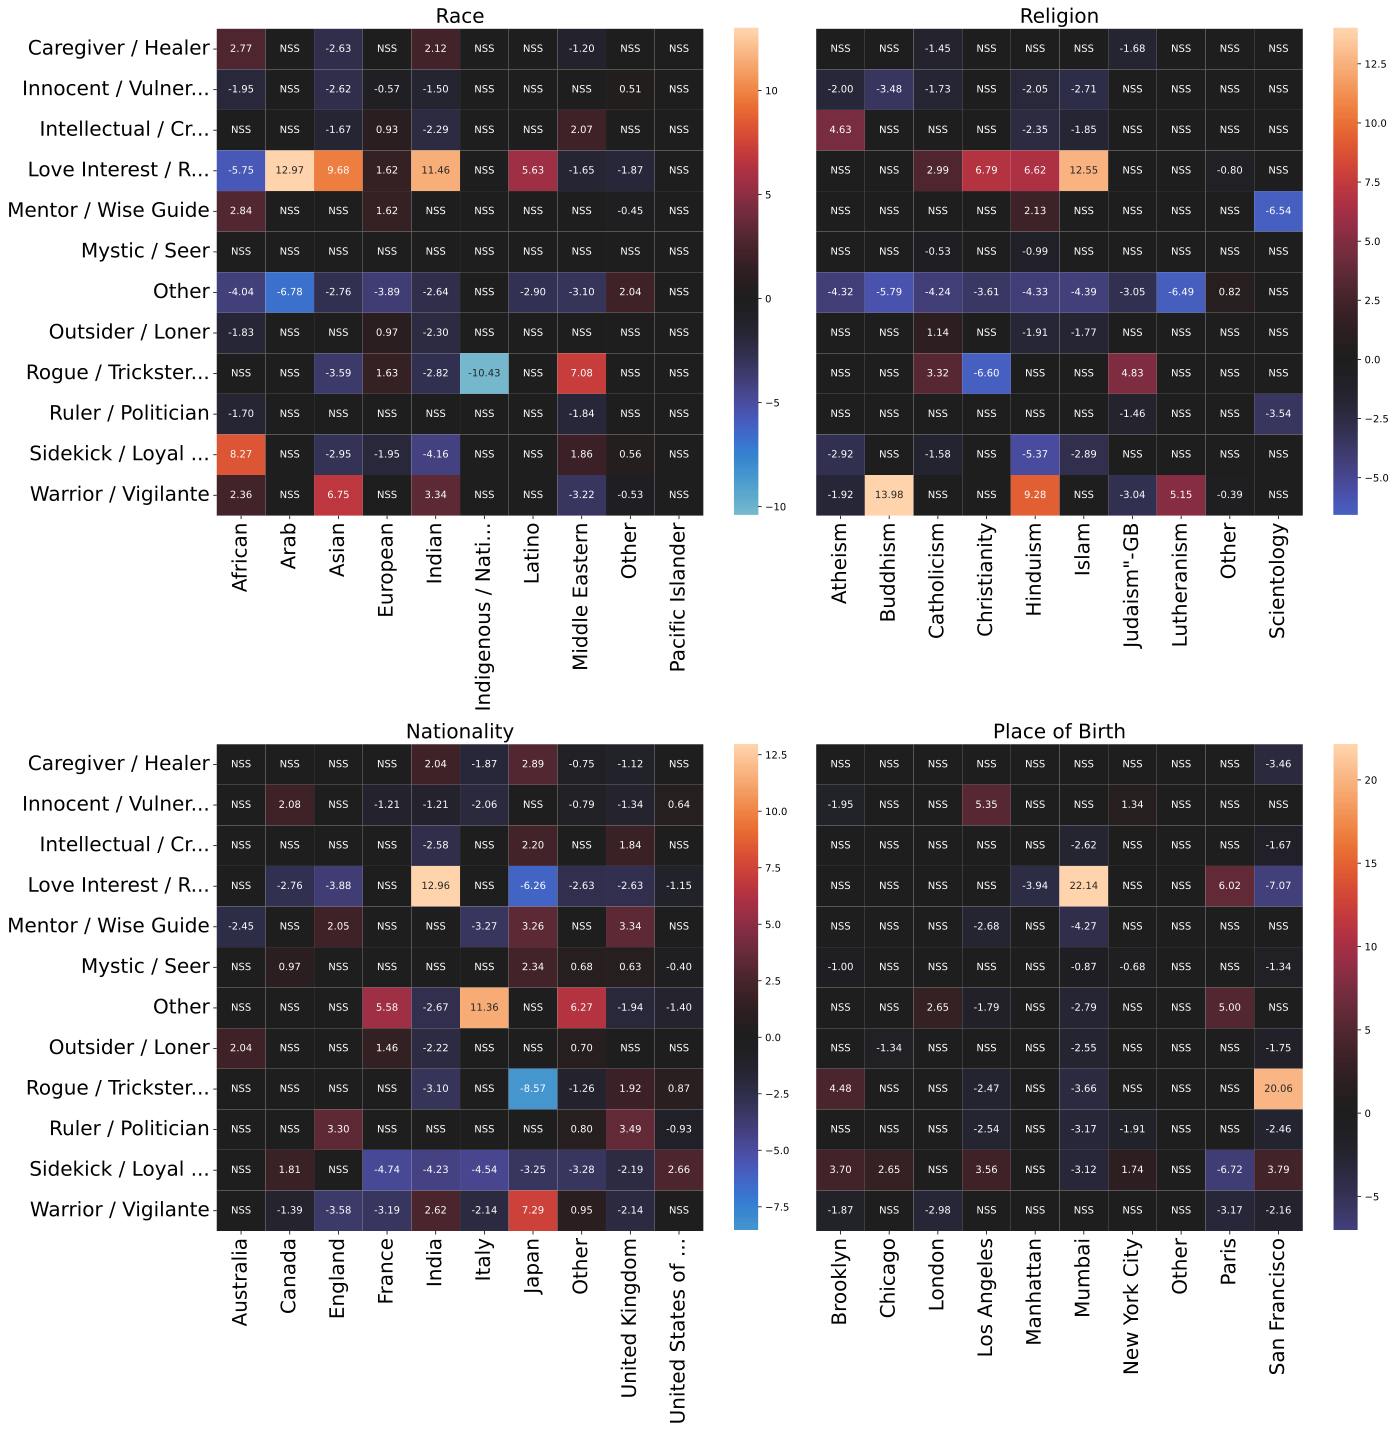

In [6]:
# hidecode

from plot_3d_like import plot_2d_heatmap
plt.figure(figsize=(2 * 10, 2 * 10))
for i, (s, title) in enumerate(zip(
    ["race", "religion", "nationality", "place_of_birth"],
    ["Race", "Religion", "Nationality", "Place of Birth"],
)):
    plt.subplot(2, 2, i + 1)
    plt.title(title, fontsize=20)
    grid = plot_2d_heatmap(
        data, s, "archetype", 
        normalize="first", 
        compare_default_value="subtract",
        percentage=True,
        num_ybins=13,
        mht=True,
    )
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if not i in [0, 2]:
        plt.yticks([])
plt.tight_layout()

- For `Love Interest / Romantic Partner`, conditioning on these features reveals a significant increase in probability for actors from India and the Middle East. This trend could reflect the influence of Turkish and Bollywood melodramas, which may have reshaped the distribution.

- For `Warrior / Vigilante`, conditioning on the features shows a notable increase in probability for actors from Asia and India. This is particularly intriguing, as the intertwined histories of Asian and Indian cultures, dating back to ancient times, are reflected here. The observation becomes even more compelling as the probabilities for Asian and Indian actors exhibit the same directional trends for almost **all other archetypes**, underscoring a deeper cultural connection.

- Another fascinating finding is that the probability of playing a `Rogue/Trickster/Con Artist` increases by 20% for actors born in San Francisco. This is difficult to understand why this happens, because `Los Angeles` and `San Francisco` are in the same state and this [website](https://www.spolinlaw.com/criminal-defense/most-dangerous-cities-in-california/) says that `Los Angeles` has higher crime rates in 2019. Maybe people from `San Francisco` just look more suspicious.

For the features `Number of Professions` and `Education` one can see that the effect is small, which means that there is no bias towards the number of professions or education of the actor.

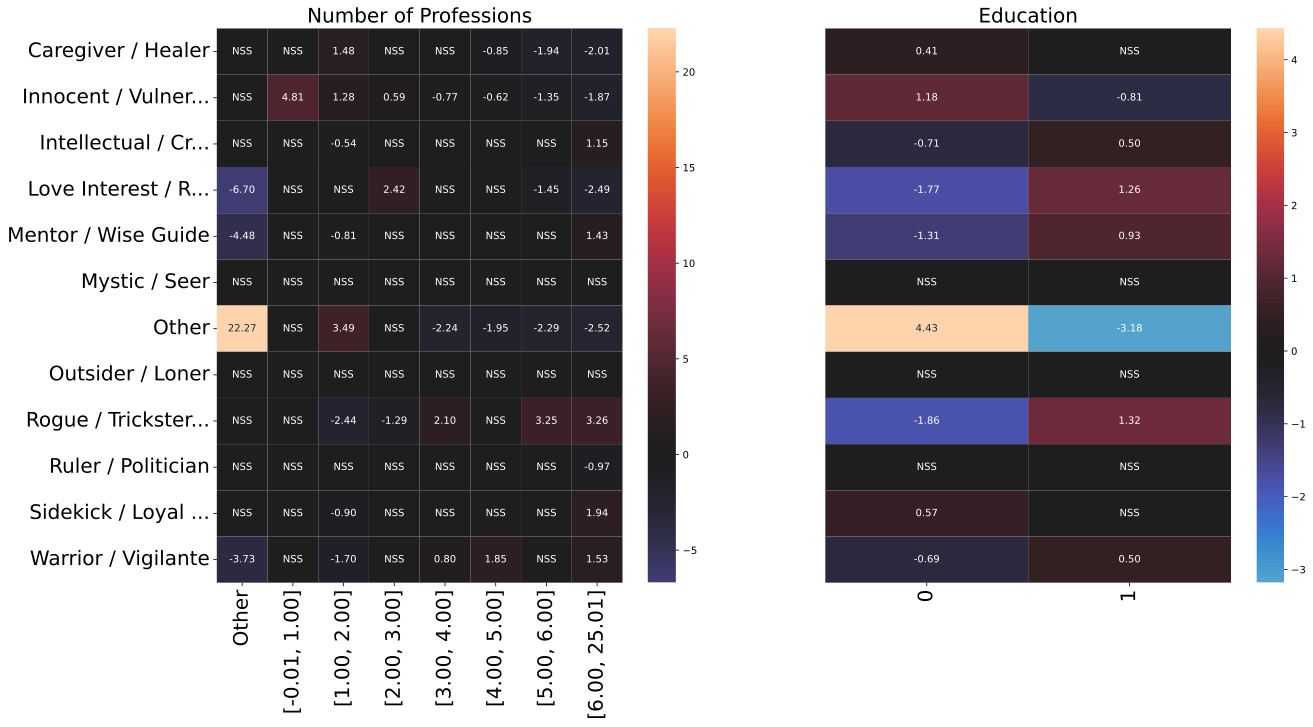

In [7]:
# hidecode

plt.figure(figsize=(2 * 10, 1 * 10))
for i, (s, title) in enumerate(zip(
    ["professions_num", "education"],
    ["Number of Professions", "Education"],
)):
    plt.subplot(1, 2, i + 1)
    plt.title(title, fontsize=20)
    data.loc[~data.education.isna(), "education"] = data.loc[~data.education.isna(), "education"].astype(str)
    grid = plot_2d_heatmap(
        data, s, "archetype", 
        normalize="first", 
        compare_default_value="subtract",
        percentage=True,
        num_ybins=13,
        mht=True,
        do_not_show_x=["Other"] if title in ["Education", "Gender"] else None,
    )
    if not i in [0]:
        plt.yticks([])
    plt.xticks(fontsize=20, rotation=90)
    plt.yticks(fontsize=20)

The figures below represents the values if we condition on numerical values such as `Weight`, `Height`, `Age in Film`, and `BMI`. The bins are sampled such that the **probability** of each bin is uniform, i.e. we \\(\text{bin}_i\\) represents \\([\operatorname{quantile}(\frac{i}{n}), \operatorname{quantile}(\frac{i}{n + 1})]\\). 

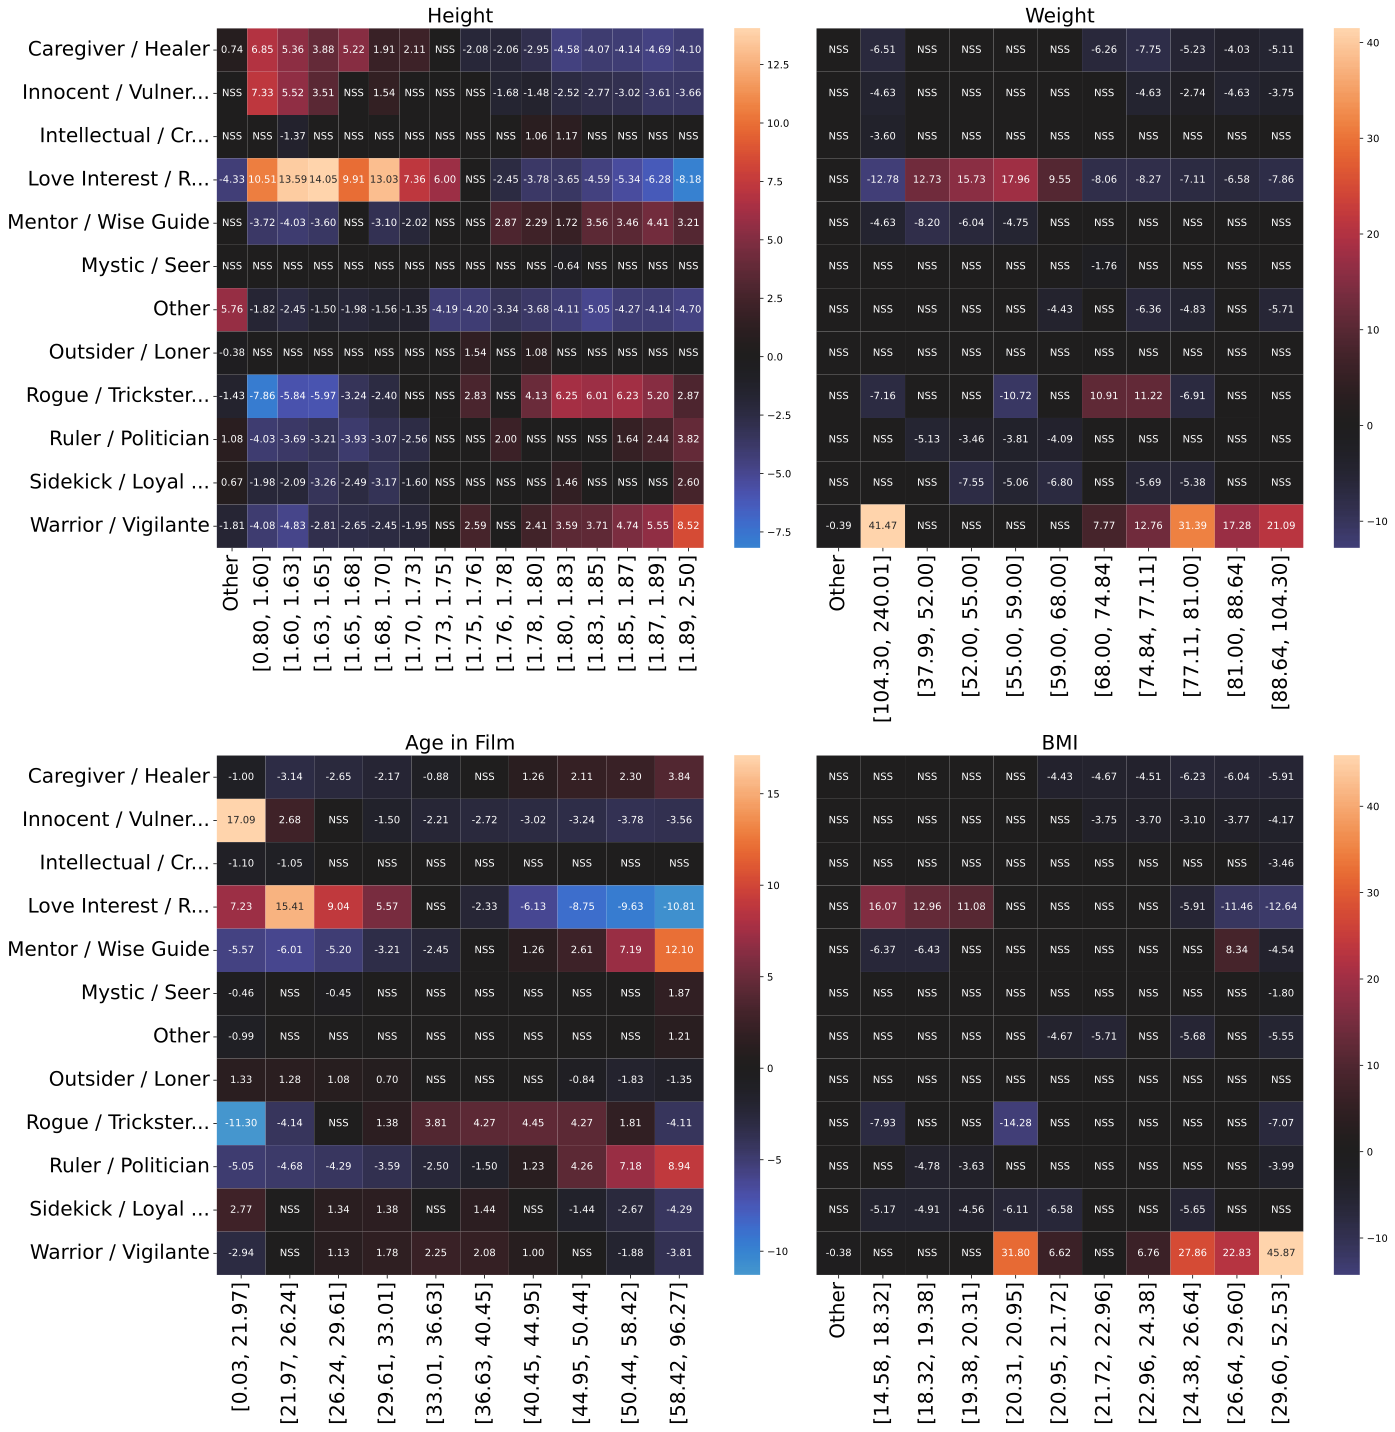

In [8]:
# hidecode

plt.figure(figsize=(2 * 10, 2 * 10))
for i, (s, title) in enumerate(zip(
    ["actor_height", "weight", "years_in_film", "actor_bmi"],
    ["Height", "Weight", "Age in Film", "BMI"],
)):
    plt.subplot(2, 2, i + 1)
        
    plt.title(title, fontsize=20)
    grid = plot_2d_heatmap(
        data, s, "archetype", 
        normalize="first", 
        compare_default_value="subtract",
        percentage=True,
        num_ybins=13,
        num_xbins = 15 if title == "Height" else 10,
        mht=True
    )
    if not i in [0, 2]:
        plt.yticks([])
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
plt.tight_layout()

*Here, we refer to the difference between probability and conditional probability simply as probability.*

- For `Love Interest/Romantic Partner`, the probability exhibits a consistent pattern across various features: it initially increases monotonically, reaches a peak, and then decreases monotonically. This indicates a clear bias among directors and screenwriters in defining the ideal archetype for this role. Based on the maxima, the "perfect" actor for this archetype would be 1.63m tall, weigh 57kg, and be 24 years old. This suggests a significant disadvantage for older, overweight, or taller actors, highlighting the film industry's limited and unfair representation of love, which can take many forms.

- For `Caregiver/Healer` and `Innocent/Vulnerable`, when conditioned on Height, the probability follows a similar pattern to Love Interest/Romantic Partner, though the peaks differ by about 3cm. An interesting observation is that for Age in Film, the probability increases monotonically for older actors. This trend also applies to archetypes like Mentor/Wise Guide and Ruler/Politician. This is logical, because those roles require a lot of experience, and in usual world elder people tend to have more experience. Or at least they know how to pretend that they have more experience.

- For `Rogue/Trickster/Con` Artist and `Warrior/Vigilante`, the probability increases with both Height and Weight. Notably, the probability of being cast as a `Warrior/Vigilante` jumps by nearly 50% for actors with a BMI of 29 or higher. This reflects the expectation that warriors should have a strong, muscular build 💪💪💪

- Another intriguing finding is that the probability of being cast as a `Ruler/Politician` increases with height. As noted in this [article](https://www.economist.com/graphic-detail/2020/02/19/in-politics-height-matters), U.S. presidents tend to be taller than the average American citizen.